<a href="https://colab.research.google.com/github/Swagat-modder/DS-Intern-Assignment-Swagat/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/data.csv")
print(df.shape)
df.head()

(16857, 29)


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
columns_to_convert = ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('float')

In [8]:
df.describe(include='all')

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15945.000000,15993.000000,15908.000000,15969.000000,15934.000000,15990.000000,16055.000000,15979.000000,16041.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,95.810413,3.938101,21.249414,39.046066,19.793113,39.494553,21.665733,38.201314,20.239922,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,50.000000,0.000000,20.500000,37.026667,18.600000,37.757500,20.533333,36.592500,19.266667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,60.000000,0.000000,21.323333,39.226667,19.600000,40.293333,21.767500,38.400000,20.290000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,182.753554,14.580575,2.165618,9.952521,2.943771,10.129513,2.594309,10.144388,2.783050,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [11]:
data_types = df.dtypes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Data Type': data_types, 'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
display(missing_info)

,Data Type,Missing Values,Missing Percentage
timestamp,datetime64[ns],0,0.000000
equipment_energy_consumption,float64,912,5.410215
lighting_energy,float64,864,5.125467
zone1_temperature,float64,949,5.629709
zone1_humidity,float64,888,5.267841
zone2_temperature,float64,923,5.475470
zone2_humidity,float64,867,5.143264
zone3_temperature,float64,802,4.757667
zone3_humidity,float64,878,5.208519
zone4_temperature,float64,816,4.840719


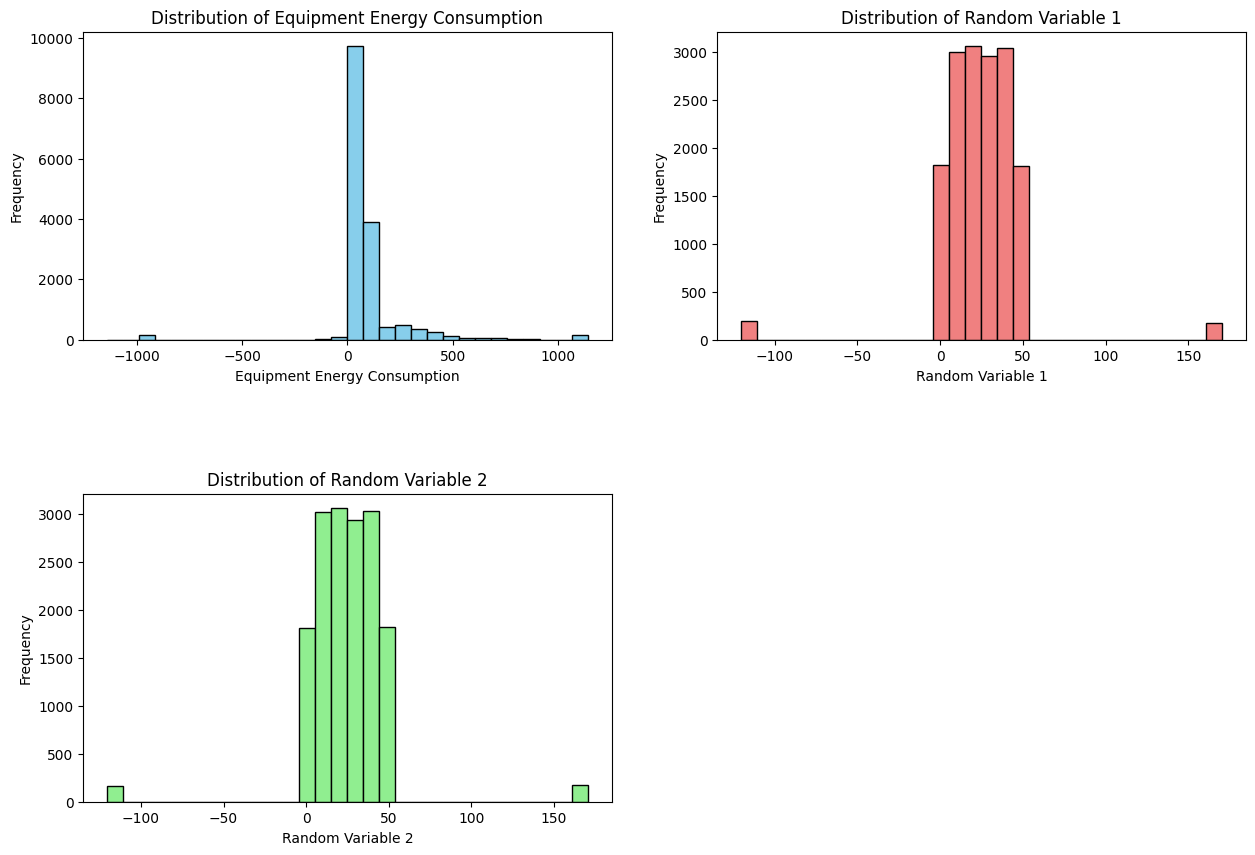

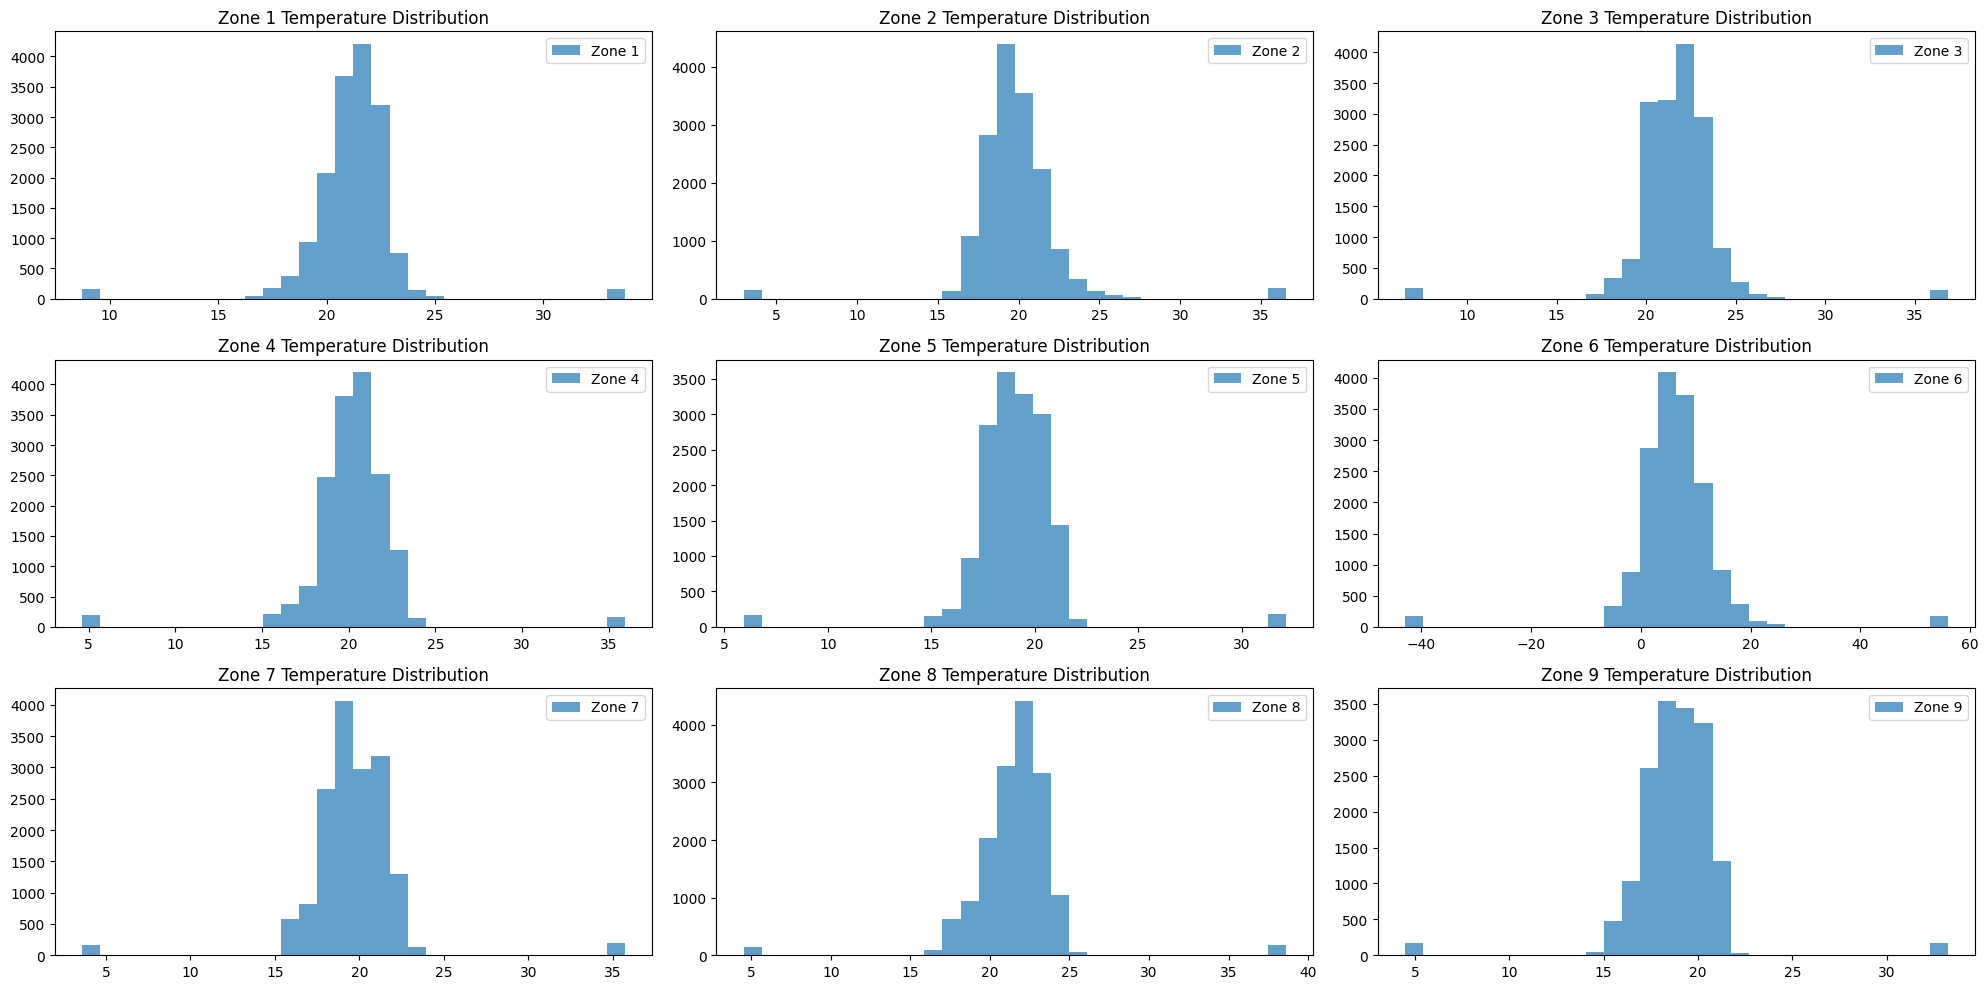

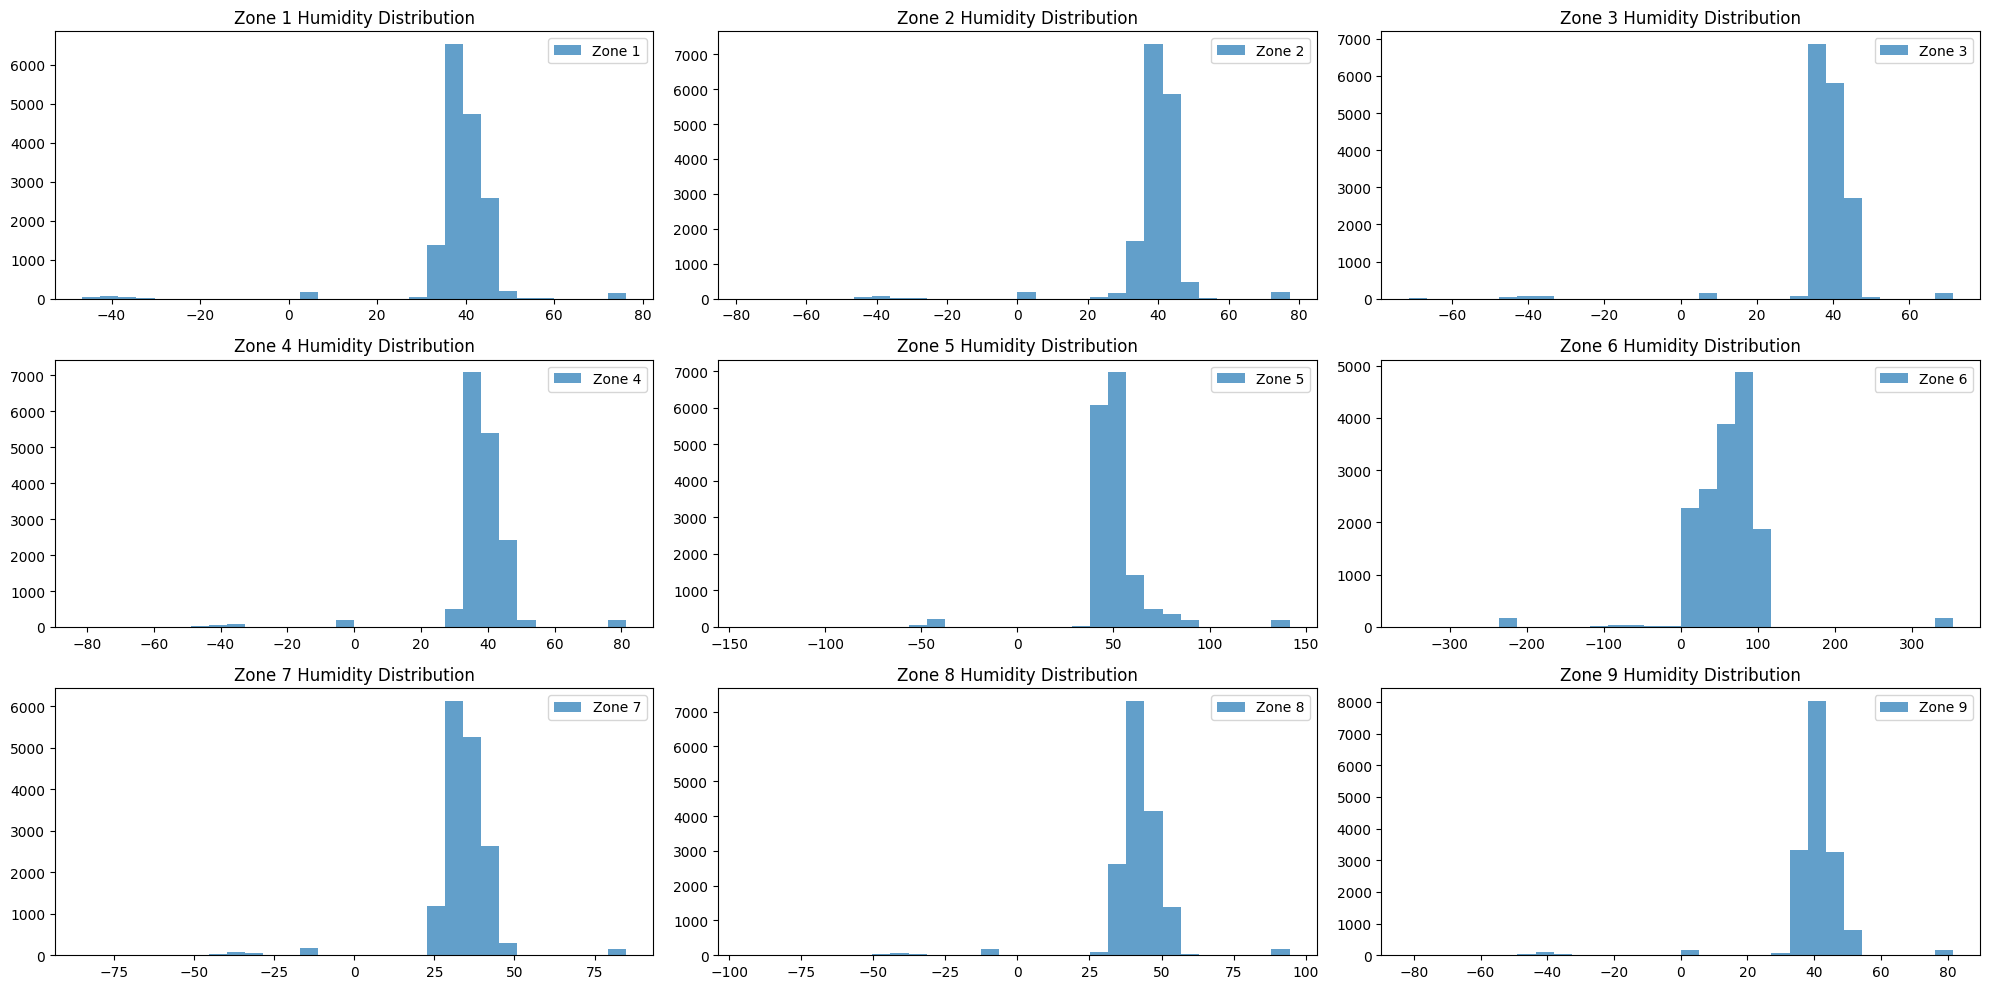

In [12]:
# Distribution Visualization
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
plt.hist(df['equipment_energy_consumption'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['random_variable1'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Random Variable 1')
plt.xlabel('Random Variable 1')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['random_variable2'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Random Variable 2')
plt.xlabel('Random Variable 2')
plt.ylabel('Frequency')

plt.show()

plt.figure(figsize=(20, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.hist(df[f'zone{i}_temperature'], bins=30, alpha=0.7, label=f'Zone {i}')
    plt.title(f'Zone {i} Temperature Distribution')
    plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.hist(df[f'zone{i}_humidity'], bins=30, alpha=0.7, label=f'Zone {i}')
    plt.title(f'Zone {i} Humidity Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

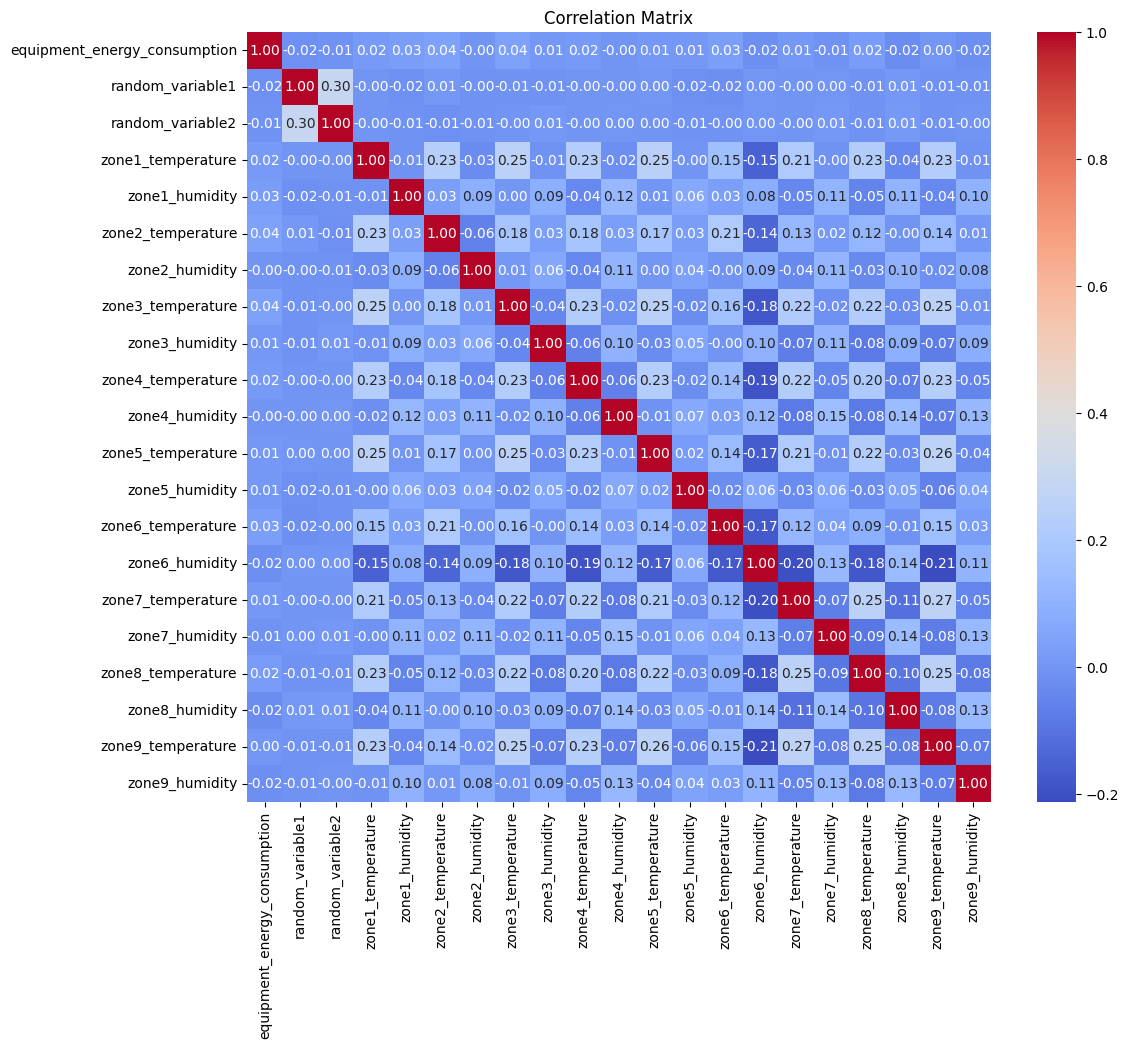

In [13]:
# Correlation Analysis
cols_for_corr = ['equipment_energy_consumption', 'random_variable1', 'random_variable2']
for i in range(1, 10):
    cols_for_corr.extend([f'zone{i}_temperature', f'zone{i}_humidity'])

corr_matrix = df[cols_for_corr].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

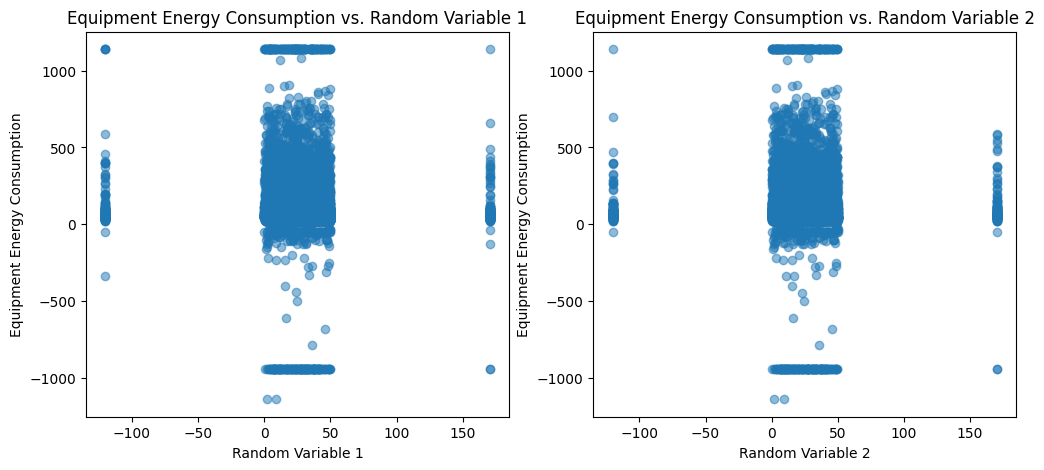

Correlation between equipment_energy_consumption and random_variable1: -0.01615519898815763
Correlation between equipment_energy_consumption and random_variable2: -0.011387127326762442


In [14]:
# Checking Correlation of Random Variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['random_variable1'], df['equipment_energy_consumption'], alpha=0.5)
plt.title('Equipment Energy Consumption vs. Random Variable 1')
plt.xlabel('Random Variable 1')
plt.ylabel('Equipment Energy Consumption')

plt.subplot(1, 2, 2)
plt.scatter(df['random_variable2'], df['equipment_energy_consumption'], alpha=0.5)
plt.title('Equipment Energy Consumption vs. Random Variable 2')
plt.xlabel('Random Variable 2')
plt.ylabel('Equipment Energy Consumption')
plt.show()

corr_rv1 = df['equipment_energy_consumption'].corr(df['random_variable1'])
corr_rv2 = df['equipment_energy_consumption'].corr(df['random_variable2'])
print(f"Correlation between equipment_energy_consumption and random_variable1: {corr_rv1}")
print(f"Correlation between equipment_energy_consumption and random_variable2: {corr_rv2}")

In [15]:
# Filling missing values in 'equipment_energy_consumption' with the median
median_consumption = df['equipment_energy_consumption'].median()
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].fillna(median_consumption)

# Handling outliers in 'equipment_energy_consumption' using IQR
Q1 = df['equipment_energy_consumption'].quantile(0.25)
Q3 = df['equipment_energy_consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['equipment_energy_consumption'] = df['equipment_energy_consumption'].clip(lower=lower_bound, upper=upper_bound)

# Removing duplicate rows
df.drop_duplicates(inplace=True)

display(df.head())

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [16]:
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month_of_year'] = df['timestamp'].dt.month

In [17]:
# Creating interaction terms for feature engineering
relevant_columns = ['zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'outdoor_temperature']

for col in relevant_columns:
    df[f'{col}_x_consumption'] = df[col] * df['equipment_energy_consumption']

In [18]:
from sklearn.model_selection import train_test_split

# Sorting the DataFrame by timestamp
df = df.sort_values(by='timestamp')

# Determining split points
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

# Split the data
df_train = df[:train_size]
df_val = df[train_size:train_size + val_size]
df_test = df[train_size + val_size:]

# Separate features and target variable
X_train = df_train.drop('equipment_energy_consumption', axis=1)
y_train = df_train['equipment_energy_consumption']
X_val = df_val.drop('equipment_energy_consumption', axis=1)
y_val = df_val['equipment_energy_consumption']
X_test = df_test.drop('equipment_energy_consumption', axis=1)
y_test = df_test['equipment_energy_consumption']

# Shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11752, 35)
y_train shape: (11752,)
X_val shape: (2518, 35)
y_val shape: (2518,)
X_test shape: (2519, 35)
y_test shape: (2519,)


In [ ]:
# Dropping the timestamp column from the training features
X_train = X_train.drop('timestamp', axis=1)
X_val = X_val.drop('timestamp', axis=1)
X_test = X_test.drop('timestamp', axis=1)

In [20]:
from sklearn.impute import SimpleImputer

# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

# Training the models
rf_model.fit(X_train_imputed, y_train)
gb_model.fit(X_train_imputed, y_train)
lr_model.fit(X_train_imputed, y_train)


LinearRegression()

Hyperparameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Combining training and validation sets
X_train_val = np.concatenate((X_train_imputed, X_val_imputed))
y_train_val = np.concatenate((y_train, y_val))

# Define the parameter grid for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

param_grid_lr={} #no hyperparameters for linear regression

model_results = {}
models = {'rf': rf_model, 'gb': gb_model, 'lr': lr_model}


# Iterate through models
for model_name, model in models.items():
    if model_name == 'rf':
        random_search = RandomizedSearchCV(model, param_distributions=param_grid_rf, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    elif model_name == 'gb':
        random_search = RandomizedSearchCV(model, param_distributions=param_grid_gb, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    elif model_name == 'lr':
        random_search = RandomizedSearchCV(model, param_distributions=param_grid_lr, n_iter=1, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    else:
        continue

    random_search.fit(X_train_val, y_train_val)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    y_pred = best_model.predict(X_val_imputed)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    model_results[model_name] = {
        'model': best_model,
        'best_params': best_params,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

# Compare model performance
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {results['best_params']}")
    print(f"RMSE: {results['rmse']}")
    print(f"MAE: {results['mae']}")
    print(f"R-squared: {results['r2']}")
    print("-" * 20)

Model: rf
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20}
RMSE: 0.8532241641269391
MAE: 0.1427669409883919
R-squared: 0.9994693281743569
--------------------
Model: gb
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
RMSE: 0.913066089157509
MAE: 0.45339650338843396
R-squared: 0.9993922791106268
--------------------
Model: lr
Best Hyperparameters: {}
RMSE: 5.99018243853547
MAE: 3.8467224631301775
R-squared: 0.9738434875873704
--------------------


Based on the available metrics, the Random Forest (rf) model appears to be the best-performing model for this task. It has the lowest RMSE and MAE, indicating better prediction accuracy, and a very high R-squared, indicating a good fit to the data.



##Model Evaluation

In [26]:
best_model = model_results['rf']['model']
y_pred = best_model.predict(X_test_imputed)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model: Random Forest")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R-squared: {r2}")

Best Model: Random Forest
Test RMSE: 2.0345037302755307
Test MAE: 0.6456890158038006
Test R-squared: 0.9966587398358997


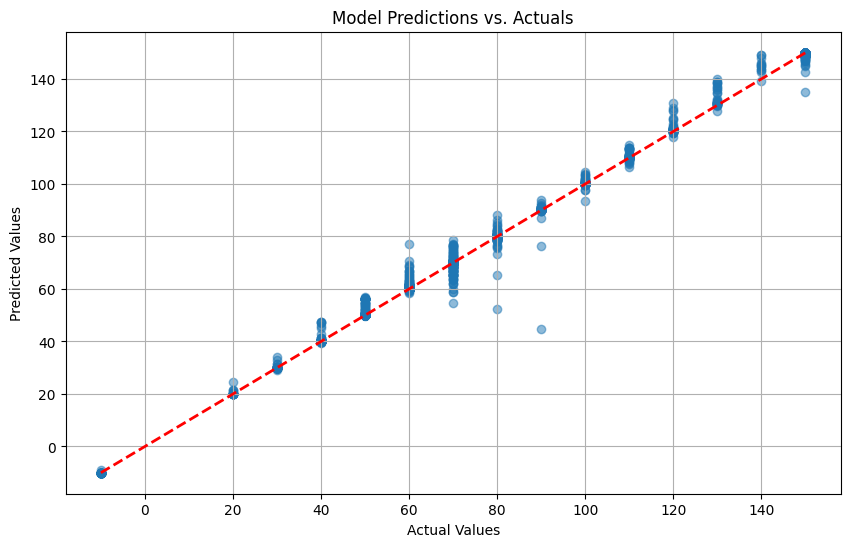

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Adding a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actuals')
plt.grid(True)
plt.show()

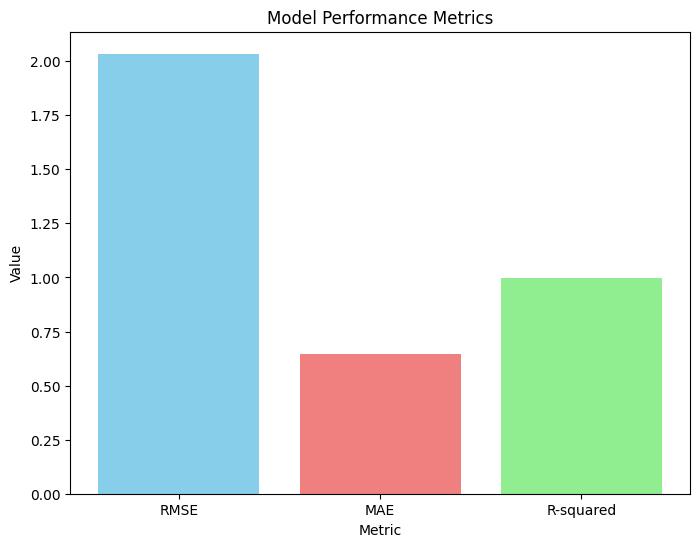

In [31]:
# Model Performance Metrics
metrics = ['RMSE', 'MAE', 'R-squared']
values = [rmse, mae, r2]
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.show()